In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
print(df.shape)
print(df.describe())
print(df.info())

(400, 5)
            User ID         Age  EstimatedSalary   Purchased
count  4.000000e+02  400.000000       400.000000  400.000000
mean   1.569154e+07   37.655000     69742.500000    0.357500
std    7.165832e+04   10.482877     34096.960282    0.479864
min    1.556669e+07   18.000000     15000.000000    0.000000
25%    1.562676e+07   29.750000     43000.000000    0.000000
50%    1.569434e+07   37.000000     70000.000000    0.000000
75%    1.575036e+07   46.000000     88000.000000    1.000000
max    1.581524e+07   60.000000    150000.000000    1.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), objec

In [4]:
print(df.Gender.value_counts())
print("******************")
#checking duplicates
print(df.duplicated().sum())
print("******************")
#checking the number of null values
print(df.isna().sum())
print("******************")

Female    204
Male      196
Name: Gender, dtype: int64
******************
0
******************
User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64
******************


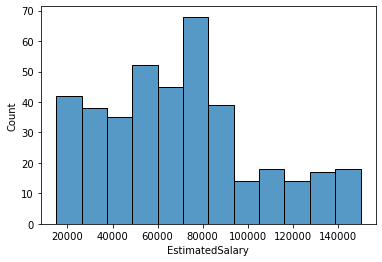

In [5]:
import seaborn as sns

sns.histplot(df.EstimatedSalary)

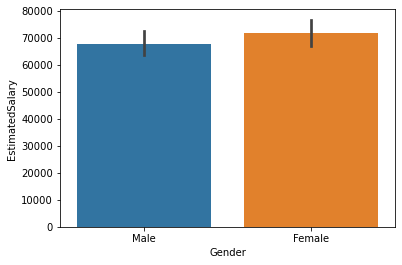

In [6]:
sns.barplot(x=df.Gender,y=df.EstimatedSalary)

In [7]:
pd.crosstab(df.Gender,df.Purchased)

Purchased,0,1
Gender,,
Female,127,77
Male,130,66


In [8]:
df1=pd.get_dummies(data=df,columns=['Gender'],drop_first=True)

In [9]:
x=df1.drop(columns=['User ID','Purchased'])
y=df1.Purchased

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=10,test_size=.3)

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
model_steps=[('sipStanderise',StandardScaler()),('shipModel',KNeighborsClassifier(n_neighbors=4,metric='minkowski',p=2))]#we will start with random value of k ,i.e n_neighbors

In [12]:
pipelineModel=Pipeline(steps=model_steps)
pipelineModel.fit(x_train,y_train)

Pipeline(steps=[('sipStanderise', StandardScaler()),
                ('shipModel', KNeighborsClassifier(n_neighbors=4))])

In [13]:
pipelineModel.score(x_train,y_train)

0.9142857142857143

In [14]:
pipelineModel.score(x_test,y_test)

0.9166666666666666

In [15]:
predic_test_y=pipelineModel.predict(x_test)
pd.crosstab(y_test,predic_test_y)

col_0,0,1
Purchased,,
0,76,7
1,3,34


In [16]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predic_test_y))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94        83
           1       0.83      0.92      0.87        37

    accuracy                           0.92       120
   macro avg       0.90      0.92      0.91       120
weighted avg       0.92      0.92      0.92       120



In [17]:
trainAccuracy=[]
testAccuracy=[]

In [18]:
for k in range(1,40):
    model=KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train,y_train)
    trainAccuracy.append(model.score(x_train,y_train))
    testAccuracy.append(model.score(x_test,y_test))

In [19]:
from matplotlib import pyplot as plt,style
style.use('ggplot')

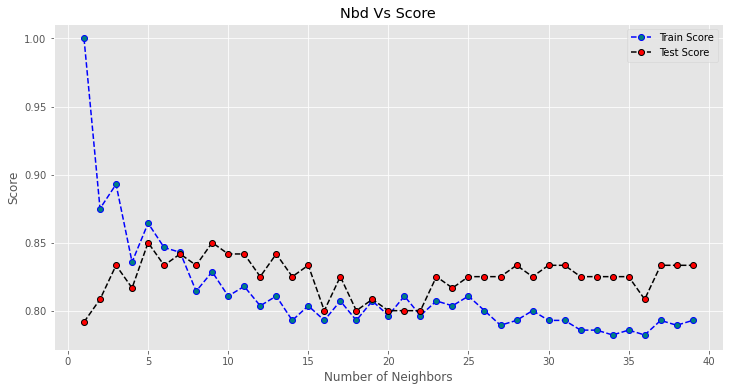

In [20]:
plt.figure(figsize=(12,6))
plt.plot(range(1,40),trainAccuracy,label="Train Score",marker="o",markerfacecolor="teal",color="blue",linestyle="dashed")
plt.plot(range(1,40),testAccuracy,label="Test Score",marker="o",markerfacecolor="red",color="black",linestyle="dashed")
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Score")
plt.title("Nbd Vs Score")
plt.show()

In [21]:
model_steps_20=[('sipStanderise',StandardScaler()),('shipModel',KNeighborsClassifier(n_neighbors=8,metric='minkowski',p=2))]
pipelineModel=Pipeline(steps=model_steps_20)
pipelineModel.fit(x_train,y_train)
print("score is:"+ str(pipelineModel.score(x_train,y_train)))
print("********************************")
pipelineModel.score(x_test,y_test)
predic_test_y=pipelineModel.predict(x_train)
print(pd.crosstab(y_train,predic_test_y))

score is:0.9071428571428571
********************************
col_0        0   1
Purchased         
0          160  14
1           12  94
